# Trump Analysis
This notebook is an analysis of the Trump Legacy dataset, which includes some sentiment analysis information as well.

In [2]:
# %pip install -U textblob

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from textblob import TextBlob

In [4]:
trump = pd.read_csv('trump_legacy/Trumps Legcy.csv')
trump.head(10)

,id,text,device,favorites,retweets,date
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,8/2/2011 18:07
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,3/3/2020 1:34
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,1/17/2020 3:22
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,9/12/2020 20:10
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,1/17/2020 13:13
5,1217960000000000000,RT @WhiteHouse: President @realDonaldTrump ann...,Twitter for iPhone,0,25048,1/17/2020 0:11
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2/1/2020 16:14
7,1319500000000000000,https://t.co/4qwCKQOiOw,Twitter for iPhone,130822,19127,10/23/2020 4:52
8,1319500000000000000,https://t.co/VlEu8yyovv,Twitter for iPhone,153446,20275,10/23/2020 4:46
9,1319500000000000000,https://t.co/z5CRqHO8vg,Twitter for iPhone,102150,14815,10/23/2020 4:46


<Axes: xlabel='date', ylabel='count'>

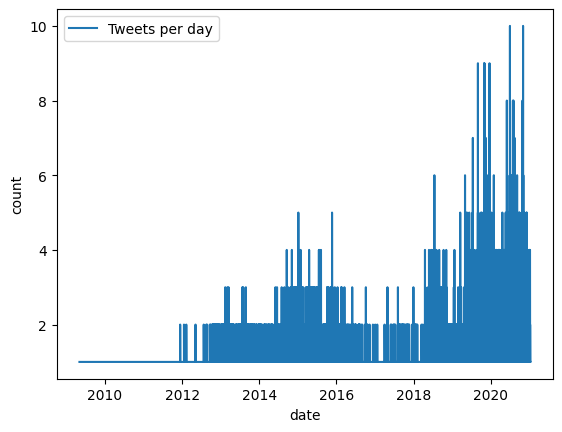

In [5]:
trump['date'] = pd.to_datetime(trump['date'])
tweets_per_day = trump['date'].value_counts().sort_index()
sns.lineplot(data=tweets_per_day, label='Tweets per day')

<Axes: xlabel='date', ylabel='count'>

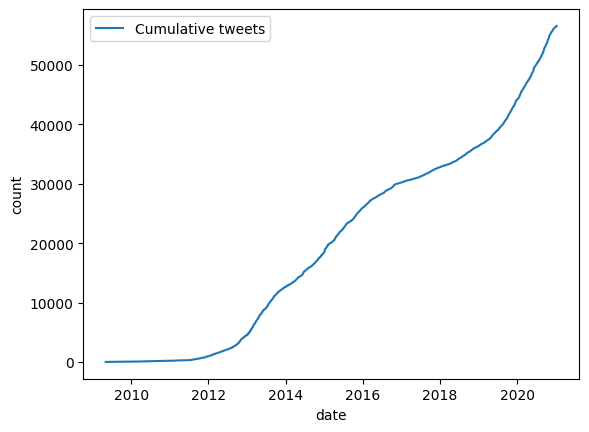

In [6]:
sum_tweets_per_day = tweets_per_day.cumsum()
sns.lineplot(data=sum_tweets_per_day, label='Cumulative tweets')

<Axes: xlabel='date', ylabel='favorites'>

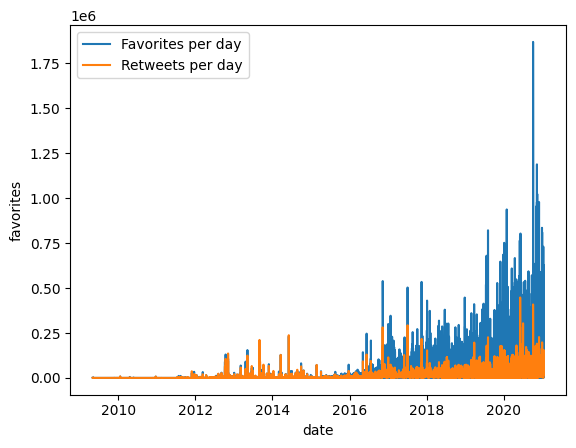

In [7]:
favorites_per_day = trump.groupby('date')['favorites'].sum()
retweets_per_day = trump.groupby('date')['retweets'].sum()
sns.lineplot(data=favorites_per_day, label='Favorites per day')
sns.lineplot(data=retweets_per_day, label='Retweets per day')

<Axes: xlabel='date', ylabel='favorites'>

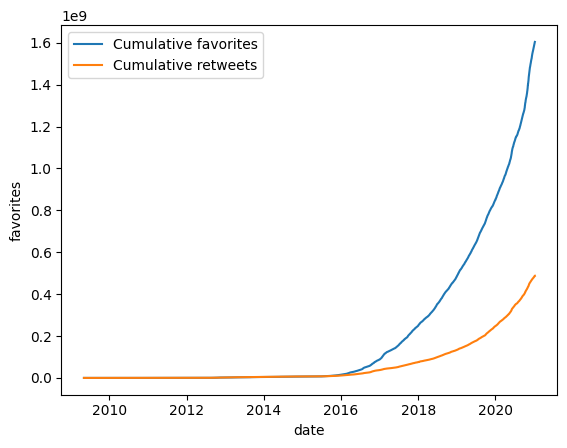

In [8]:
cum_favorites_per_day = favorites_per_day.cumsum()
cum_retweets_per_day = retweets_per_day.cumsum()
sns.lineplot(data=cum_favorites_per_day, label='Cumulative favorites')
sns.lineplot(data=cum_retweets_per_day, label='Cumulative retweets')

In [9]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

vectorized_get_polarity = np.vectorize(get_polarity)

trump['polarity'] = vectorized_get_polarity(trump['text'])

In [10]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

vectorized_get_subjectivity = np.vectorize(get_subjectivity)

trump['subjectivity'] = vectorized_get_subjectivity(trump['text'])

In [11]:
trump.head(10)

,id,text,device,favorites,retweets,date,polarity,subjectivity
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,2011-08-02 18:07:00,0.200000,0.200000
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,2020-03-03 01:34:00,0.458929,0.483333
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,2020-01-17 03:22:00,0.050000,0.300000
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,2020-09-12 20:10:00,0.021131,0.454762
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,2020-01-17 13:13:00,0.268750,0.500000
5,1217960000000000000,RT @WhiteHouse: President @realDonaldTrump ann...,Twitter for iPhone,0,25048,2020-01-17 00:11:00,0.095238,0.200794
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2020-02-01 16:14:00,-0.234375,0.500000
7,1319500000000000000,https://t.co/4qwCKQOiOw,Twitter for iPhone,130822,19127,2020-10-23 04:52:00,0.000000,0.000000
8,1319500000000000000,https://t.co/VlEu8yyovv,Twitter for iPhone,153446,20275,2020-10-23 04:46:00,0.000000,0.000000
9,1319500000000000000,https://t.co/z5CRqHO8vg,Twitter for iPhone,102150,14815,2020-10-23 04:46:00,0.000000,0.000000


In [12]:
trump['polarityBinned'] = pd.cut(trump['polarity'], bins=[-1, -0.6, -0.2, 0.2, 0.6, 1], labels=['highly negative', 'negative', 'neutral', 'positive', 'highly positive'])
trump['subjectivityBinned'] = pd.cut(trump['subjectivity'], bins=[-0.25, 0, 0.25, 0.5, 0.75, 1], labels=['very objective', 'objective', 'neutral', 'subjective', 'highly subjective'])
trump.head(20)

,id,text,device,favorites,retweets,date,polarity,subjectivity,polarityBinned,subjectivityBinned
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,2011-08-02 18:07:00,0.200000,0.200000,neutral,objective
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,2020-03-03 01:34:00,0.458929,0.483333,positive,neutral
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,2020-01-17 03:22:00,0.050000,0.300000,neutral,neutral
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,2020-09-12 20:10:00,0.021131,0.454762,neutral,neutral
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,2020-01-17 13:13:00,0.268750,0.500000,positive,neutral
5,1217960000000000000,RT @WhiteHouse: President @realDonaldTrump ann...,Twitter for iPhone,0,25048,2020-01-17 00:11:00,0.095238,0.200794,neutral,objective
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2020-02-01 16:14:00,-0.234375,0.500000,negative,neutral
7,1319500000000000000,https://t.co/4qwCKQOiOw,Twitter for iPhone,130822,19127,2020-10-23 04:52:00,0.000000,0.000000,neutral,very objective
8,1319500000000000000,https://t.co/VlEu8yyovv,Twitter for iPhone,153446,20275,2020-10-23 04:46:00,0.000000,0.000000,neutral,very objective
9,1319500000000000000,https://t.co/z5CRqHO8vg,Twitter for iPhone,102150,14815,2020-10-23 04:46:00,0.000000,0.000000,neutral,very objective


polarityBinned
neutral            30709
positive           14303
highly positive     6293
negative            4146
highly negative      864
Name: count, dtype: int64


<Axes: ylabel='count'>

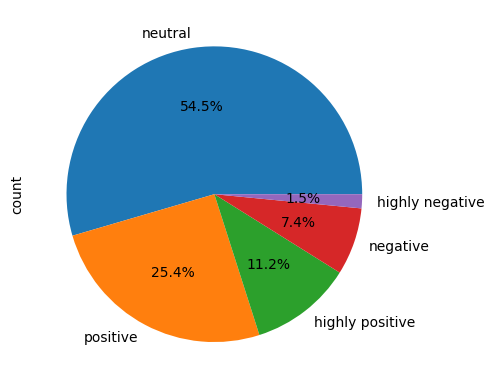

In [13]:
polarity_counts = trump['polarityBinned'].value_counts()
print(trump['polarityBinned'].value_counts())
polarity_counts.plot.pie(autopct='%1.1f%%')

subjectivityBinned
subjective           15568
very objective       14455
neutral              14303
highly subjective     6992
objective             5253
Name: count, dtype: int64


<Axes: ylabel='count'>

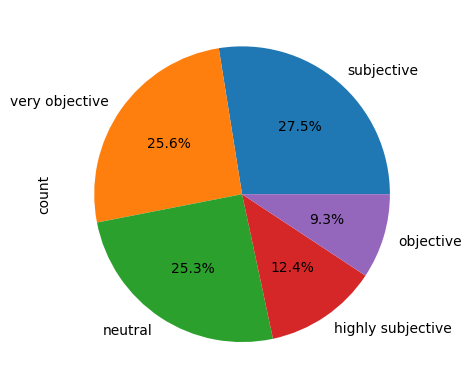

In [14]:
subjectivity_counts = trump['subjectivityBinned'].value_counts()
print(trump['subjectivityBinned'].value_counts())
subjectivity_counts.plot.pie(autopct='%1.1f%%')

In [15]:
negative_tweet = trump[trump['polarityBinned'].isin(['negative', 'highly negative'])]['text']
for tweet in negative_tweet[:10]:
    print("-" + tweet + "\n")

-Getting a little exercise this morning! https://t.co/fyAAcbhbgk

-Nevada is turning out to be a cesspool of Fake Votes. @mschlapp &amp; @AdamLaxalt are finding things that, when released, will be absolutely shocking!

-Just landed in Ohio. See you in a little while!

-RT @RandPaul: Somebody is mad that @realDonaldTrump didn’t start any wars and wants to leave the ones we are in. Vote Biden/Harris if you w…

-RT @alexbruesewitz: 🚨🚨🚨

Fake News @BBCWorld reached out for an interview.

I agreed.

I let them know that their country’s opinion stopped…

-RT @realDonaldTrump: ANTIFA SCUM ran for the hills today when they tried attacking the people at the Trump Rally, because those people aggr…

-...ABC/WaPo had me down 17 points in Wisconsin, the day before the election, and I WON! In Iowa, the polls had us 4 points down, and I won by 8.2%! Fox News and Quinnipiac were wrong on everything...

-RT @realDonaldTrump: John Bolton was one of the dumbest people in government that I’ve had the “ple

In [16]:
def is_only_link(text):
    text = text.strip()
    return text.startswith('http://') or text.startswith('https://') and ' ' not in text

# Remove rows where text is only a link
link_filtered = trump[~trump['text'].apply(is_only_link)]
link_filtered.head(10)

,id,text,device,favorites,retweets,date,polarity,subjectivity,polarityBinned,subjectivityBinned
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,2011-08-02 18:07:00,0.200000,0.200000,neutral,objective
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,2020-03-03 01:34:00,0.458929,0.483333,positive,neutral
2,1218010000000000000,RT @CBS_Herridge: READ: Letter to surveillance...,Twitter for iPhone,0,7396,2020-01-17 03:22:00,0.050000,0.300000,neutral,neutral
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,2020-09-12 20:10:00,0.021131,0.454762,neutral,neutral
4,1218160000000000000,RT @MZHemingway: Very friendly telling of even...,Twitter for iPhone,0,9081,2020-01-17 13:13:00,0.268750,0.500000,positive,neutral
5,1217960000000000000,RT @WhiteHouse: President @realDonaldTrump ann...,Twitter for iPhone,0,25048,2020-01-17 00:11:00,0.095238,0.200794,neutral,objective
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2020-02-01 16:14:00,-0.234375,0.500000,negative,neutral
11,1319500000000000000,RT @EricTrump: https://t.co/NcrNdOSfIV,Twitter for iPhone,0,8921,2020-10-23 04:30:00,0.000000,0.000000,neutral,very objective
12,1236500000000000000,RT @GOPChairwoman: The economic boom continues...,Twitter for iPhone,0,8681,2020-03-08 04:01:00,0.250000,0.200000,positive,objective
13,1225840000000000000,RT @TomFitton: Vindman's behavior is a scandal...,Twitter for iPhone,0,7679,2020-02-07 17:35:00,-0.062500,0.062500,neutral,objective


polarityBinned
neutral            29466
positive           14303
highly positive     6293
negative            4146
highly negative      864
Name: count, dtype: int64


<Axes: ylabel='count'>

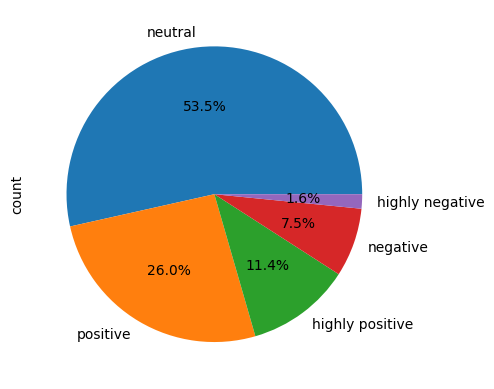

In [17]:
polarity_counts = link_filtered['polarityBinned'].value_counts()
print(link_filtered['polarityBinned'].value_counts())
polarity_counts.plot.pie(autopct='%1.1f%%')

subjectivityBinned
subjective           15568
neutral              14302
very objective       13213
highly subjective     6992
objective             5253
Name: count, dtype: int64


<Axes: ylabel='count'>

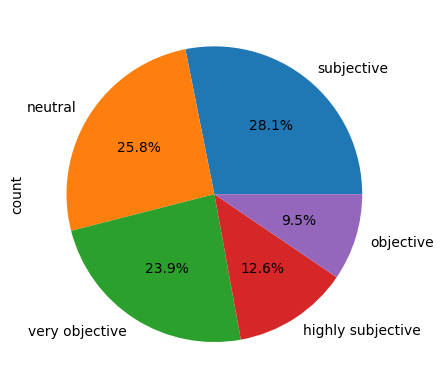

In [18]:
subjectivity_counts = link_filtered['subjectivityBinned'].value_counts()
print(link_filtered['subjectivityBinned'].value_counts())
subjectivity_counts.plot.pie(autopct='%1.1f%%')

In [19]:
# Remove rows where text is a retweet
retweet_filtered = link_filtered[~link_filtered['text'].str.startswith('RT')]
retweet_filtered.head(10)

,id,text,device,favorites,retweets,date,polarity,subjectivity,polarityBinned,subjectivityBinned
0,98455000000000000,Republicans and Democrats have both created ou...,TweetDeck,49,255,2011-08-02 18:07:00,0.200000,0.200000,neutral,objective
1,1234650000000000000,I was thrilled to be back in the Great city of...,Twitter for iPhone,73748,17404,2020-03-03 01:34:00,0.458929,0.483333,positive,neutral
3,1304880000000000000,The Unsolicited Mail In Ballot Scam is a major...,Twitter for iPhone,80527,23502,2020-09-12 20:10:00,0.021131,0.454762,neutral,neutral
6,1223640000000000000,Getting a little exercise this morning! https:...,Twitter for iPhone,285863,30209,2020-02-01 16:14:00,-0.234375,0.500000,negative,neutral
14,1215250000000000000,Thank you Elise! https://t.co/Y4Hb0zf5jk,Twitter for iPhone,48510,11608,2020-01-09 12:24:00,0.000000,0.000000,neutral,very objective
15,1319490000000000000,"As per your request, Joe... https://t.co/78mzc...",Twitter for iPhone,253761,79855,2020-10-23 04:09:00,0.000000,0.000000,neutral,very objective
19,1325880000000000000,The threshold identification of Ballots is tur...,Twitter for iPhone,493076,100609,2020-11-09 19:36:00,0.241071,0.602381,positive,subjective
20,1315780000000000000,"“I’m running as a proud Democrat, for the Sena...",Twitter for iPhone,142084,32953,2020-10-12 22:22:00,0.350000,0.900000,positive,highly subjective
21,1319680000000000000,HUGE win today for the United States and for p...,Twitter for iPhone,215994,51830,2020-10-23 16:55:00,0.506250,0.700000,positive,subjective
23,1319660000000000000,Thank you Megyn! https://t.co/sC71EEWIOd,Twitter for iPhone,178163,24864,2020-10-23 15:04:00,0.000000,0.000000,neutral,very objective


polarityBinned
neutral            23055
positive           12450
highly positive     5746
negative            3429
highly negative      729
Name: count, dtype: int64


<Axes: ylabel='count'>

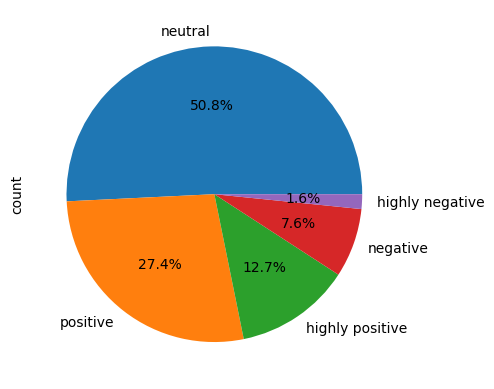

In [20]:
polarity_counts = retweet_filtered['polarityBinned'].value_counts()
print(retweet_filtered['polarityBinned'].value_counts())
polarity_counts.plot.pie(autopct='%1.1f%%')

subjectivityBinned
subjective           15568
neutral              14302
very objective       13213
highly subjective     6992
objective             5253
Name: count, dtype: int64


<Axes: ylabel='count'>

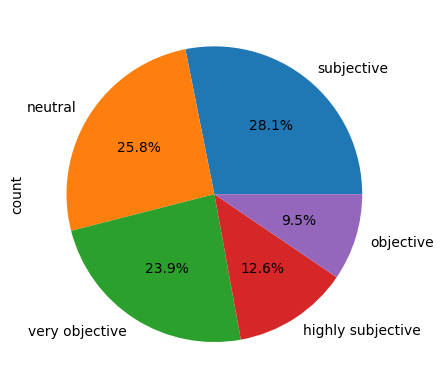

In [21]:
subjectivity_counts = link_filtered['subjectivityBinned'].value_counts()
print(link_filtered['subjectivityBinned'].value_counts())
subjectivity_counts.plot.pie(autopct='%1.1f%%')

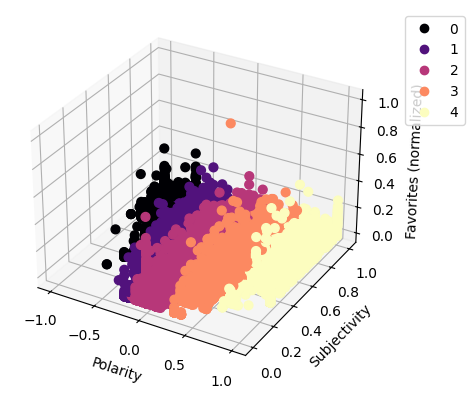

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = ListedColormap(sns.color_palette("magma", 256).as_hex())
sc = ax.scatter(retweet_filtered["polarity"], retweet_filtered["subjectivity"], retweet_filtered["favorites"] / retweet_filtered["favorites"].abs().max() , s=40, c=pd.cut(retweet_filtered['polarity'], bins=5, labels=False), marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Favorites (normalized)')

plt.show()

In [33]:
polarity_mapping = {'highly negative': -2, 'negative': -1, 'neutral': 0, 'positive': 1, 'highly positive': 2}
trump['polarityNumerical'] = trump['polarityBinned'].map(polarity_mapping)
df = trump[['date', 'polarityNumerical']]
